In [1]:
"""
Python可视化matplotlib&seborn16-相关性heatmap
原创 pythonic生物人 pythonic生物人 2020-08-06 07:06

Python可视化matplotlib&seborn14-热图heatmap
Python可视化matplotlib&seborn15-聚类热图clustermap
本文介绍python绘制相关性热图，为以上热图的进阶版。
0、成品图展示
请浏览微信帖子或查看代码同目录图片文件：
普通相关性heatmap.png
聚类相关性heatmap.png

1、数据准备
2、seaborn.heatmap绘制correlation heatmap
默认参数绘制correlation heatmap
vmax设置颜色深浅 
cmp参数变换colormap 
annot、fmt、annot_kws设置格子中文本
mask设置部分数据显示

3、seaborn.clustermap绘制correlation clustermap 
"""
import warnings
warnings.filterwarnings("ignore")

In [3]:
"""
1、数据准备
关键一步，使用pandas的corr函数生成相关矩阵。
"""
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable

# 生成随机数
rs = np.random.RandomState(33)#类似np.random.seed，即每次括号中的种子33不变，每次可获得相同的随机数
d = pd.DataFrame(data=rs.normal(size=(100, 26)),#normal生成高斯分布的概率密度随机数，需要在变量rs下使用
                 columns=list(ascii_letters[26:]))

# corr函数计算相关性矩阵(correlation matrix)
dcorr = d.corr(method='pearson')#默认为'pearson'检验，可选'kendall','spearman'
print(d.shape)
d.head()

(100, 26)


,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258


In [5]:
"""
经过corr函数变换后 ，变成26x26的方形矩阵。
"""
print(dcorr.shape)
dcorr.head()

(26, 26)


,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,...,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,...,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,...,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,...,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,...,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


<AxesSubplot: >

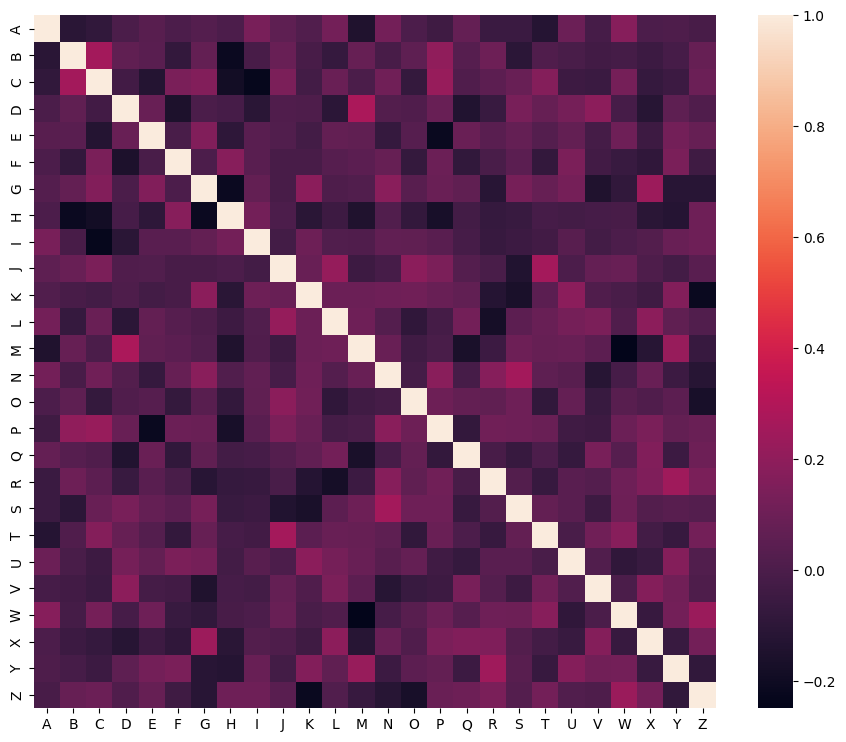

In [6]:
"""
2、seaborn.heatmap绘制correlation heatmap
默认参数绘制correlation heatmap
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,)

<AxesSubplot: >

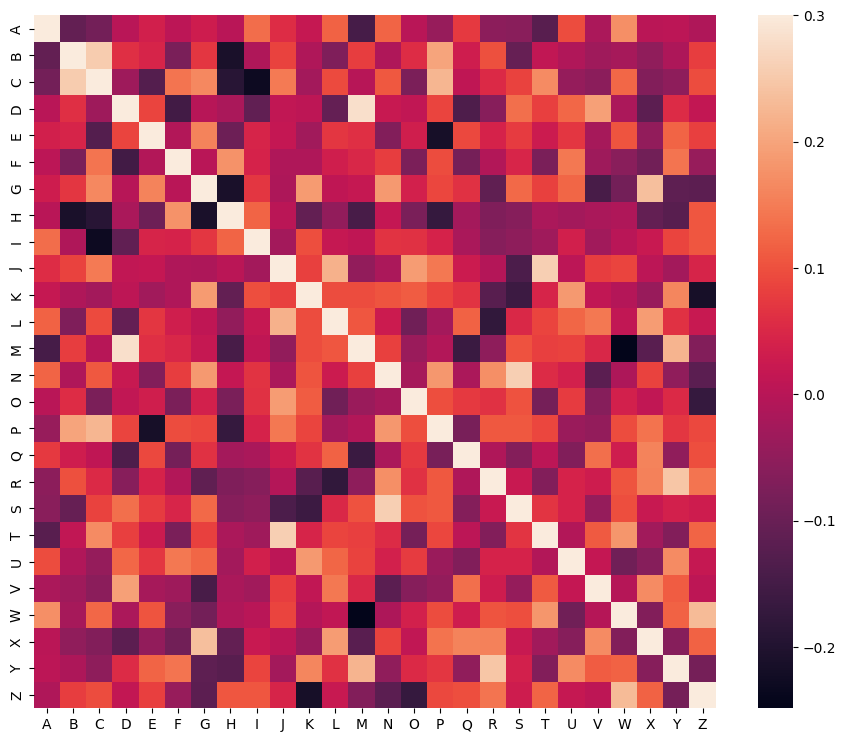

In [7]:
"""
vmax设置颜色深浅
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, #上图颜色太深，不美观，让整体颜色变浅点           
           )

<AxesSubplot: >

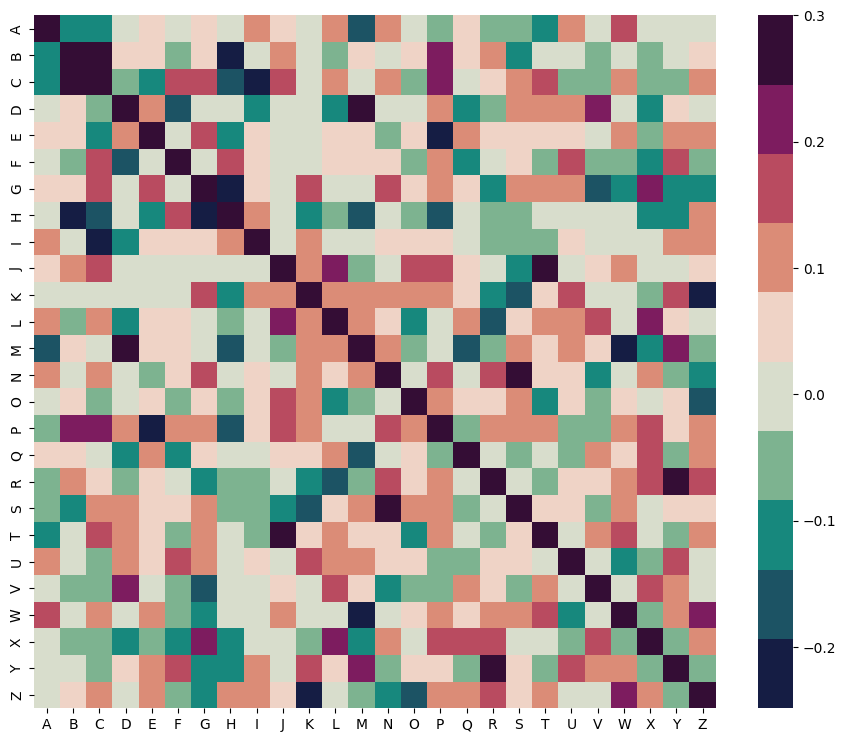

In [8]:
"""
cmp参数变换colormap
关于colormap可参考：
matplotlib中Colormap
python Palettable库中Colormap
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors, #换个colormap          
           )

<AxesSubplot: >

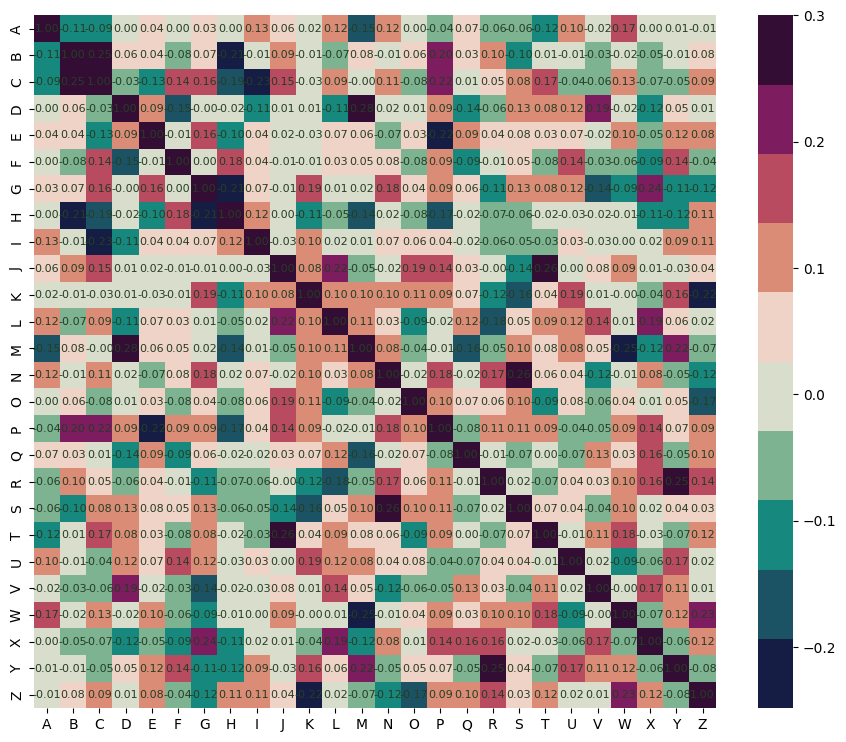

In [9]:
"""
annot、fmt、annot_kws设置格子中文本
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,#图中数字文本显示
            fmt=".2f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
           )

<AxesSubplot: >

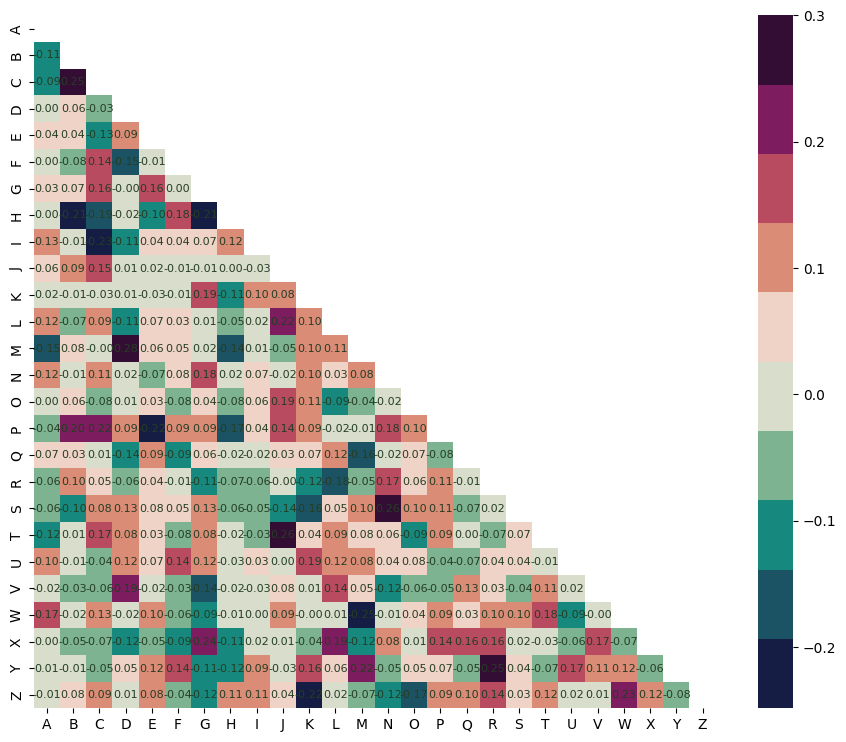

In [10]:
"""
mask设置部分数据显示
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图
           )

<AxesSubplot: >

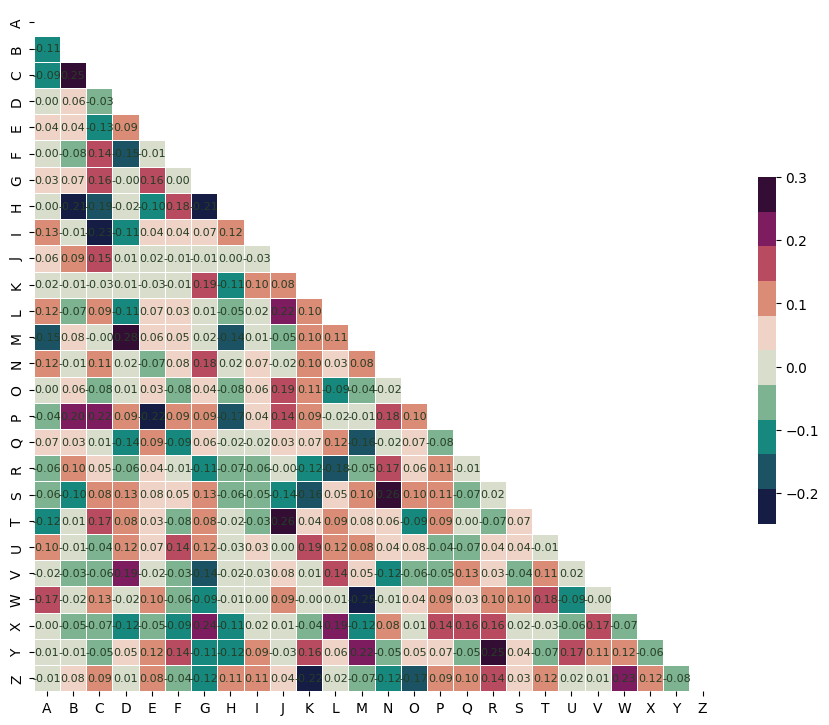

In [11]:
"""
square、linewidths、 cbar_kws设置方格外框、图例设置
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示对脚线下面部分图
            square=True, linewidths=.5,#每个方格外框显示，外框宽度设置
            cbar_kws={"shrink": .5}
           )

<Figure size 1100x900 with 0 Axes>

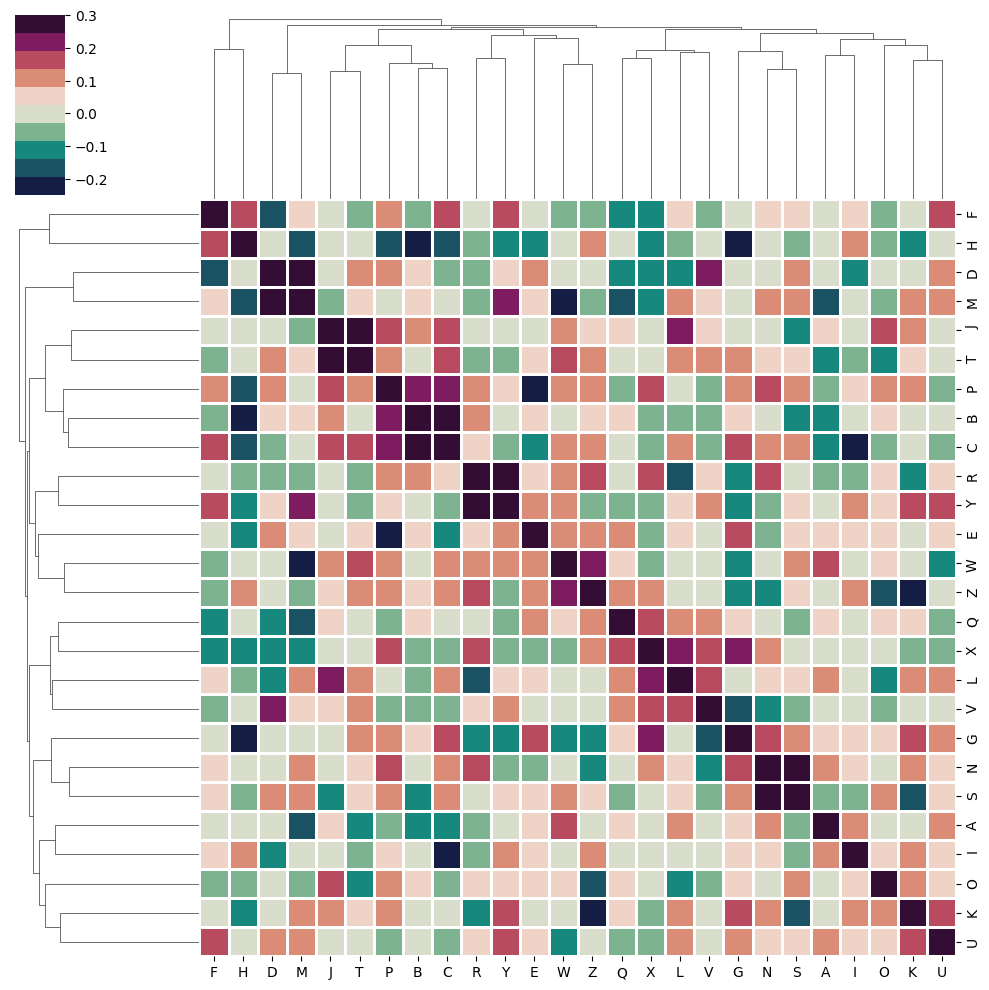

In [12]:
"""
3、seaborn.clustermap绘制correlation clustermap
"""
plt.figure(figsize=(11, 9),dpi=100)
sns.clustermap(data=dcorr,
               vmax=0.3,
               cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
               linewidths=.75,       
                              
              )

<Figure size 1300x1300 with 0 Axes>

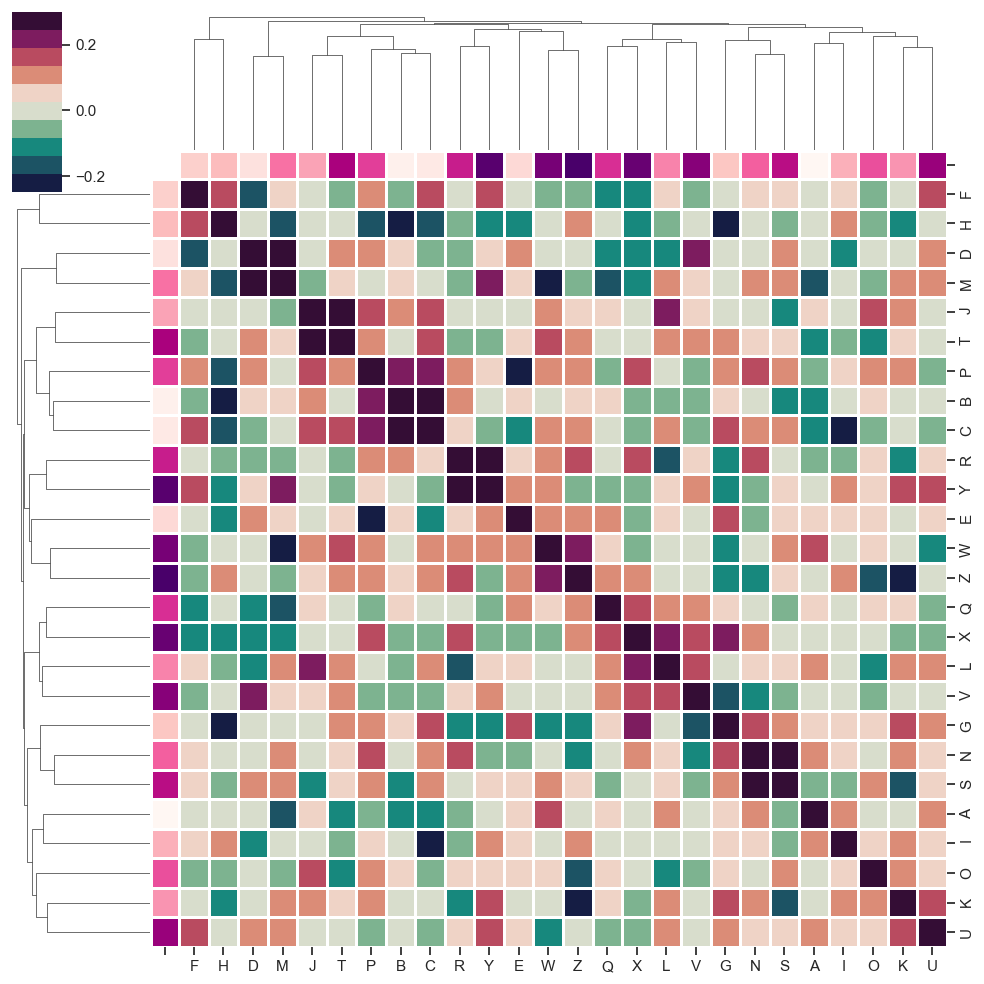

In [13]:
"""
注意左上方分类条
"""
row_c = dict(zip(list(ascii_letters[26:]), plt.get_cmap('RdPu')(np.linspace(0, 1, 26))))
index_c = dict(zip(list(ascii_letters[26:]), plt.get_cmap('RdPu')(np.linspace(0, 1, 26))))
sns.set(style="ticks")
plt.figure(figsize=(13, 13))
sns.clustermap(data=dcorr,
               vmax=0.3,
               cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
               linewidths=.75,
               row_colors=pd.Series(dcorr.columns.get_level_values(None), index=dcorr.columns).map(row_c), #行方向聚类用颜色区分不同类 
               col_colors=pd.Series(dcorr.columns.get_level_values(None), index=dcorr.columns).map(index_c),   
               dendrogram_ratio=0.15,# 图放大缩小
              )

In [ ]:
"""
相关性热图（correlation heatmap& correlation clustermap）是heatmap和clustermap的变种，更多参数设置请戳：
Python可视化matplotlib&seborn14-热图heatmap
Python可视化matplotlib&seborn15-聚类热图clustermap
"""